<a href="https://colab.research.google.com/github/Roshni-AngelAlex/Machine-learning-24ADI003-/blob/main/MLLABEX3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression and Optimization**

**(Multi Linear and Polynomial regression)**

**LAB EXPERIMENT 3**



NAME:ROSHNI ANGEL A,ROLLNO:24BAD101
Model Evaluation:
MSE : 207.05407001047286
RMSE: 14.389373510006363
R² Score: 0.03411211351611809

Regression Coefficients:
                       Feature  Coefficient
0                  Study_Hours     0.232854
1                   Attendance    -0.402584
2  parental level of education    -1.011591
3      test preparation course     3.846420
4                  Sleep_Hours     0.863027


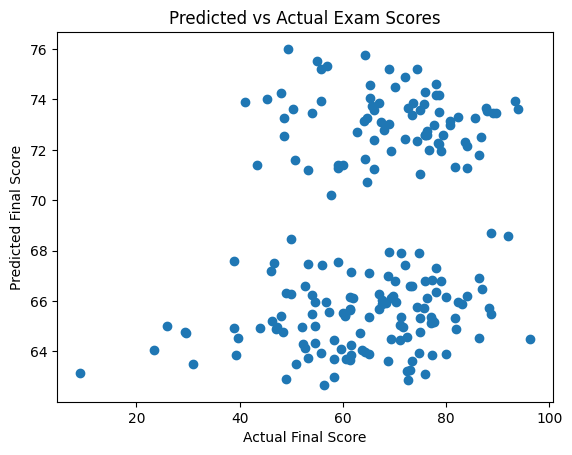

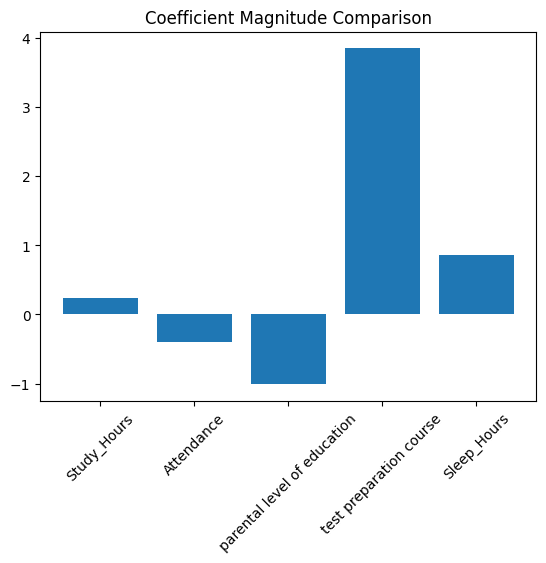

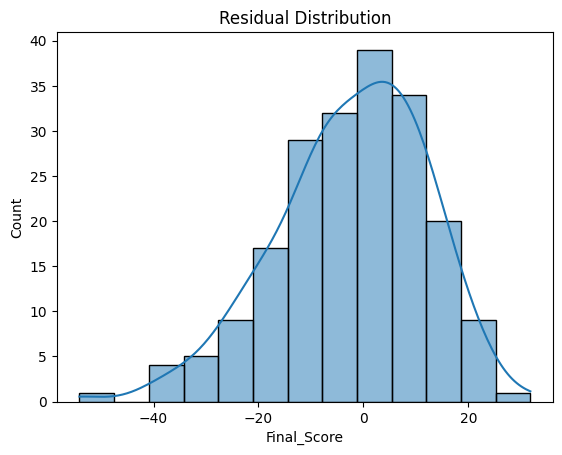

In [1]:
# SCENARIO 1 – MULTILINEAR REGRESSION
# Student Academic Performance Prediction

# 1. Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
df = pd.read_csv("/content/StudentsPerformance.csv")

print("NAME:ROSHNI ANGEL A,ROLLNO:24BAD101")

# 3. Encode Categorical Features
df['test preparation course'] = df['test preparation course'].map(
    {'none': 0, 'completed': 1}
)

df['parental level of education'] = (
    df['parental level of education']
    .astype('category')
    .cat.codes
)

# 4. Create Target Variable (Final Exam Score)
df['Final_Score'] = (
    df['math score'] +
    df['reading score'] +
    df['writing score']
) / 3

# 5. Handle Missing Values
df.fillna(df.mean(numeric_only=True), inplace=True)

# 6. Add Simulated Academic & Lifestyle Features
np.random.seed(42)
df['Study_Hours'] = np.random.randint(1, 6, size=len(df))
df['Attendance'] = np.random.randint(60, 100, size=len(df))
df['Sleep_Hours'] = np.random.randint(5, 9, size=len(df))

# 7. Select Features and Target
X = df[['Study_Hours', 'Attendance',
        'parental level of education',
        'test preparation course',
        'Sleep_Hours']]
y = df['Final_Score']

# 8. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 9. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 10. Train Multilinear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 11. Predictions
y_pred = model.predict(X_test)

# 12. Model Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print("MSE :", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

# 13. Regression Coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nRegression Coefficients:")
print(coeff_df)

# 14. Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

# 15. Lasso Regression
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

# 16. Visualization

# A. Predicted vs Actual
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Predicted vs Actual Exam Scores")
plt.show()

# B. Coefficient Comparison
plt.bar(coeff_df['Feature'], coeff_df['Coefficient'])
plt.xticks(rotation=45)
plt.title("Coefficient Magnitude Comparison")
plt.show()

# C. Residual Distribution
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()


NAME:ROSHNI ANGEL A,ROLLNO:24BAD101


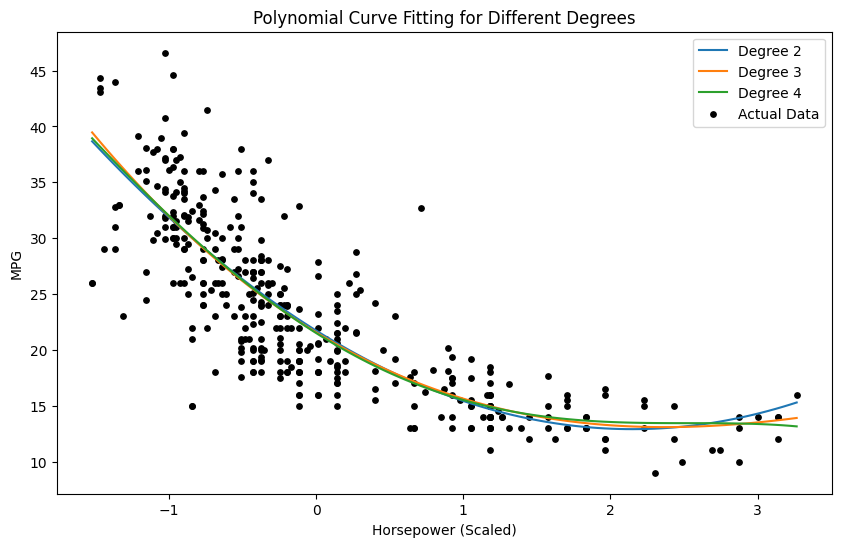

Polynomial Regression Model Performance:

Degree 2:
 MSE  = 18.42
 RMSE = 4.29
 R²   = 0.64

Degree 3:
 MSE  = 18.46
 RMSE = 4.30
 R²   = 0.64

Degree 4:
 MSE  = 18.27
 RMSE = 4.27
 R²   = 0.64

Ridge Regression (Degree 4):
 MSE  = 18.307301054985473
 RMSE = 4.278703197814202
 R²   = 0.6413187331941281


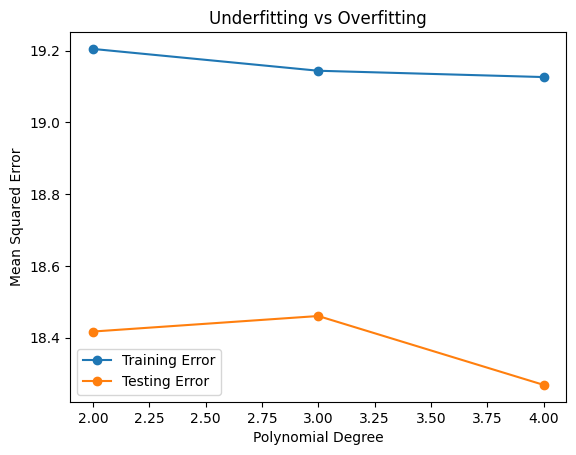

In [2]:
# SCENARIO 2 – POLYNOMIAL REGRESSION
# Predict Vehicle Fuel Efficiency using Engine Horsepower

# 1. Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load and Clean Auto MPG Dataset

df = pd.read_csv("/content/auto-mpg.csv")

print("NAME:ROSHNI ANGEL A,ROLLNO:24BAD101")
# Replace '?' with NaN and convert horsepower to numeric
df['horsepower'] = df['horsepower'].replace('?', np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'])

# Handle missing values by dropping rows
df.dropna(inplace=True)

# 3. Select Feature and Target
X = df[['horsepower']]   # Independent variable
y = df['mpg']            # Target variable

# 4. Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# 6. Polynomial Regression (Degrees 2, 3, 4)
degrees = [2, 3, 4]
train_errors = []
test_errors = {}

plt.figure(figsize=(10, 6))

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Evaluation
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors[degree] = (mse, rmse, r2)

    # Plot polynomial curve
    X_range = np.linspace(X_scaled.min(), X_scaled.max(), 100).reshape(-1, 1)
    X_range_poly = poly.transform(X_range)
    y_range_pred = model.predict(X_range_poly)

    plt.plot(X_range, y_range_pred, label=f"Degree {degree}")

# Scatter actual data
plt.scatter(X_scaled, y, color='black', s=15, label="Actual Data")
plt.xlabel("Horsepower (Scaled)")
plt.ylabel("MPG")
plt.title("Polynomial Curve Fitting for Different Degrees")
plt.legend()
plt.show()


# 7. Print Evaluation Metrics
print("Polynomial Regression Model Performance:\n")
for degree, values in test_errors.items():
    print(f"Degree {degree}:")
    print(f" MSE  = {values[0]:.2f}")
    print(f" RMSE = {values[1]:.2f}")
    print(f" R²   = {values[2]:.2f}")
    print()

# 8. Ridge Regression (Degree 4)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)
ridge_pred = ridge.predict(X_test_poly)

ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)

print("Ridge Regression (Degree 4):")
print(" MSE  =", ridge_mse)
print(" RMSE =", ridge_rmse)
print(" R²   =", ridge_r2)

# 9. Training vs Testing Error Plot
plt.plot(degrees, train_errors, marker='o', label="Training Error")
plt.plot(degrees, [test_errors[d][0] for d in degrees],
         marker='o', label="Testing Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Underfitting vs Overfitting")
plt.legend()
plt.show()
